# Regular Genomics Project **RNA Localisation**


In [1]:
from keras.optimizers import Nadam
from keras.losses import KLDivergence, CategoricalCrossentropy

from utils import prepare_data, set_variables
from plotting import plot_line_graph
from metrics import pearson, Pearson
from models import CNN
from plotting import box_plot
from keras.callbacks import ModelCheckpoint

2023-07-08 13:58:35.436239: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 13:58:36.378118: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 13:58:36.383135: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 13:58:44.129053: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data(colab=False)  # Set colab = True for colab

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'CNN_architecture7'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train= set_variables(model_name, max_seq_len)

Add s
Add d
Add p
Add s
Add d
Add p
Add f
Add e


2023-07-08 14:00:10.129120: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1131151360 exceeds 10% of free system memory.
2023-07-08 14:00:10.441073: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1131151360 exceeds 10% of free system memory.
2023-07-08 14:00:10.918719: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1131151360 exceeds 10% of free system memory.


Add e


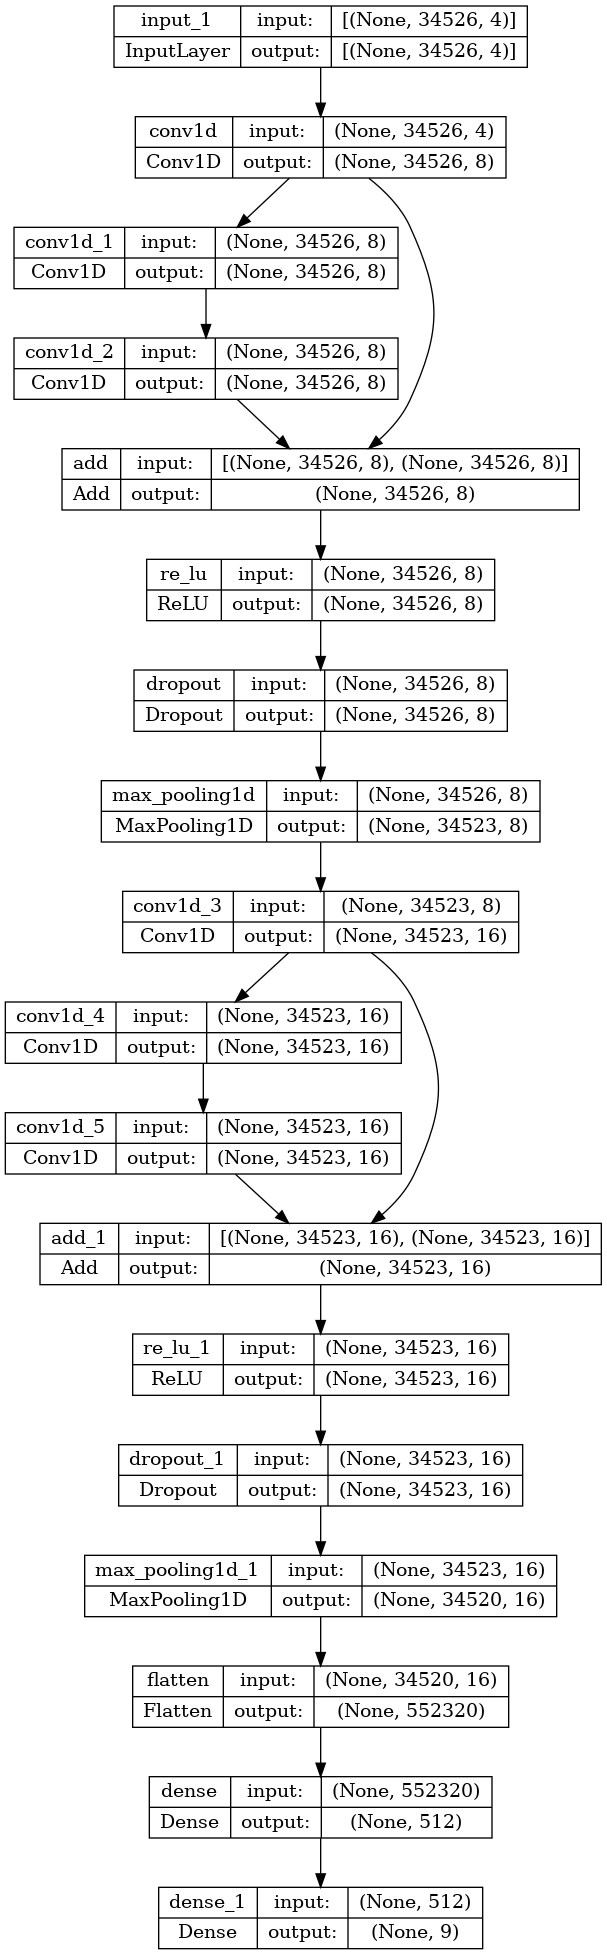

In [4]:
model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            optimizer=Nadam(),
            loss=CategoricalCrossentropy(), #KLDivergence(),
            metrics=[pearson, Pearson(name="class_pearson"), KLDivergence(name="kullback_leibler_divergence"), "accuracy"],
            )

model.print_model()
# model.summary() #if information about number of params needed

In [ ]:
model.summary()

In [5]:
checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

callbacks=[model_checkpoint_callback]

history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train, callback=callbacks)

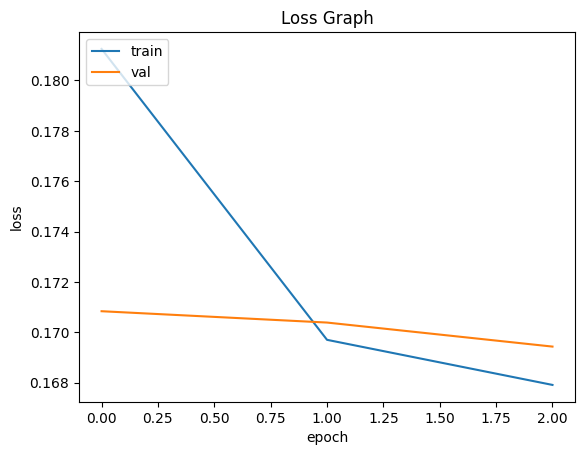

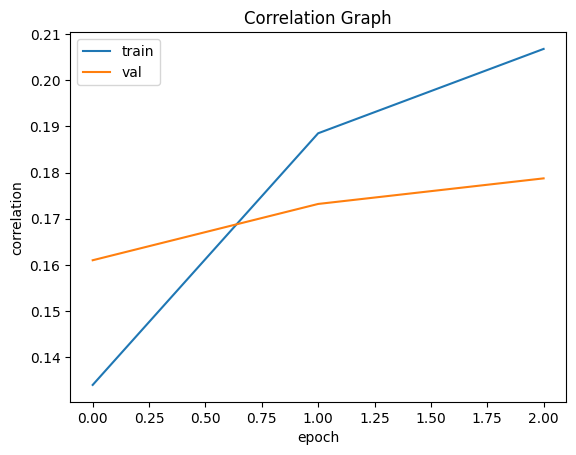

In [7]:
a = model.summary()
print(a)


plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

plt_data = [history.history['pearson'], history.history['val_pearson']]
plot_line_graph(plt_data, "Correlation Graph", 'correlation', 'epoch', ['train', 'val'])


plt_data = [history.history['class_pearson'], history.history['val_class_pearson']]
plot_line_graph(plt_data, "class_pearson Graph", 'class_pearson', 'epoch', ['train', 'val'])

plt_data = [history.history['accuracy'], history.history['val_accuracy']]
plot_line_graph(plt_data, "accuracy Graph", 'accuracy', 'epoch', ['train', 'val'])

plt_data = [history.history['kullback_leibler_divergence'], history.history['val_kullback_leibler_divergence']]
plot_line_graph(plt_data, "kullback_leibler_divergence Graph", 'kullback_leibler_divergence', 'epoch', ['train', 'val'])

plt_data = [history.history['class_pearson'], history.history['val_class_pearson']]
plot_line_graph(plt_data, "class_pearson Graph", 'class_pearson', 'epoch', ['train', 'val'])



box_plot(train_data)

In [8]:
model.print_model(model_architecture_path)
model.save_model(model_output_path)